In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_hub as hub

In [2]:
model = tf.keras.models.load_model(
       ('model_14class_v3.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [5]:
def preprocess_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Display the original image
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    
    # Resize the image to the required input shape of the model
    resized_image = image.resize((224, 224))
    
    # Convert the image to a NumPy array
    array_image = np.array(resized_image)
    
    # Normalize pixel values to the range [0, 1]
    normalized_image = array_image / 255.0
    
    # Return the preprocessed image
    return normalized_image

In [6]:
image_path = 'S__4259883.jpg' #INSERT IMAGE PATH

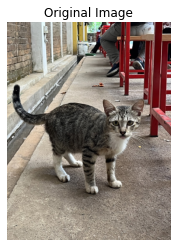

1/1 [==============================] - 0s 38ms/step
Predicted class: Cat


In [7]:

preprocessed_images = preprocess_image(image_path)
data = np.expand_dims(preprocessed_images, axis=0)

predictions = model.predict(data)

predicted_class_index = np.argmax(predictions)

class_labels = ['Arctic Fox',
                'Butterfly',
                'Cat',
                'Cheetah',
                'Chicken',
                'Chimpanzee',
                'Cow',
                'Dog',
                'Elephant',
                'Hamster',
                'Horse',
                'Sheep',
                'Spider',
                'Squirrel']

predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)